In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [2]:
df = pd.read_csv("/content/drive/MyDrive/marketing_AB.csv")

In [3]:
print(df.head())

   Unnamed: 0  user id test group  converted  total ads most ads day  \
0           0  1069124         ad      False        130       Monday   
1           1  1119715         ad      False         93      Tuesday   
2           2  1144181         ad      False         21      Tuesday   
3           3  1435133         ad      False        355      Tuesday   
4           4  1015700         ad      False        276       Friday   

   most ads hour  
0             20  
1             22  
2             18  
3             10  
4             14  


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


In [5]:
df.describe()

,Unnamed: 0,user id,total ads,most ads hour
count,588101.000000,5.881010e+05,588101.000000,588101.000000
mean,294050.000000,1.310692e+06,24.820876,14.469061
std,169770.279668,2.022260e+05,43.715181,4.834634
min,0.000000,9.000000e+05,1.000000,0.000000
25%,147025.000000,1.143190e+06,4.000000,11.000000
50%,294050.000000,1.313725e+06,13.000000,14.000000
75%,441075.000000,1.484088e+06,27.000000,18.000000
max,588100.000000,1.654483e+06,2065.000000,23.000000


In [7]:
df.isnull().sum()

Unnamed: 0       0
user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64

In [ ]:
ax = sns.countplot(x="converted", hue="test group", data=df)

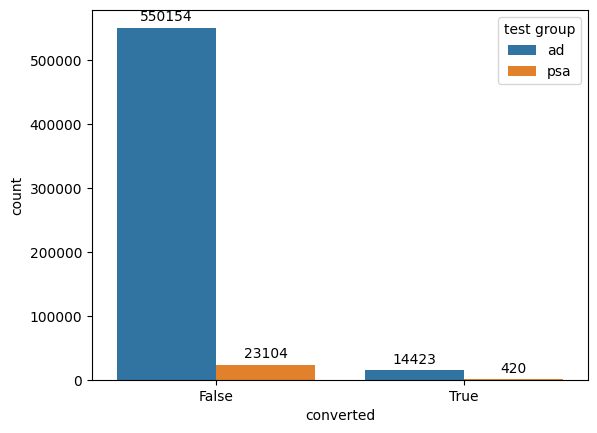

  test group  converted   count
0         ad      False  550154
1         ad       True   14423
2        psa      False   23104
3        psa       True     420


In [11]:
ax = sns.countplot(x="converted", hue="test group", data=df)
counts = df.groupby(["test group", "converted"]).size().reset_index(name="count")
for i, bar in enumerate(ax.containers):
    for j, count in enumerate(bar):
        height = count.get_height()
        ax.annotate(counts.iloc[i*2+j]["count"], xy=(count.get_x() + count.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha="center", va="bottom")
plt.show()
print(counts)

In [12]:
ttest_results = ttest_ind(df[df["test group"] == "ad"]["converted"], df[df["test group"] == "psa"]["converted"])
print(ttest_results)

Ttest_indResult(statistic=7.37040597428566, pvalue=1.7033052627831264e-13)


In [13]:
conversion_rates = df.groupby("test group")["converted"].mean()
print(conversion_rates)

test group
ad     0.025547
psa    0.017854
Name: converted, dtype: float64


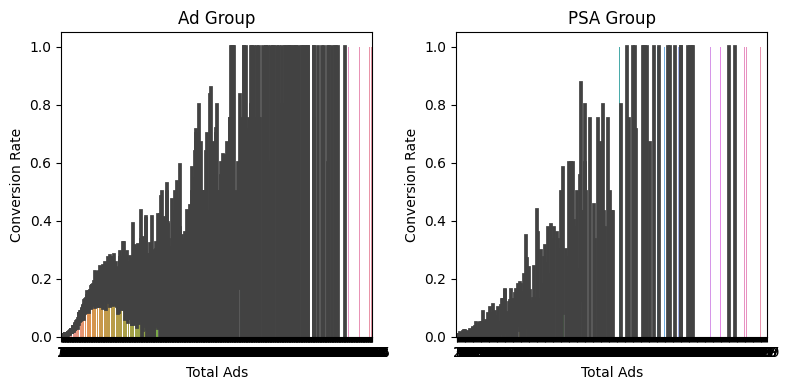

In [16]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=2, figsize=(8, 4))

sns.barplot(x="total ads", y="converted", data=df[df["test group"] == "ad"], ax=ax[0])
ax[0].set(title="Ad Group", xlabel="Total Ads", ylabel="Conversion Rate")

sns.barplot(x="total ads", y="converted", data=df[df["test group"] == "psa"], ax=ax[1])
ax[1].set(title="PSA Group", xlabel="Total Ads", ylabel="Conversion Rate")

plt.tight_layout()
plt.show()

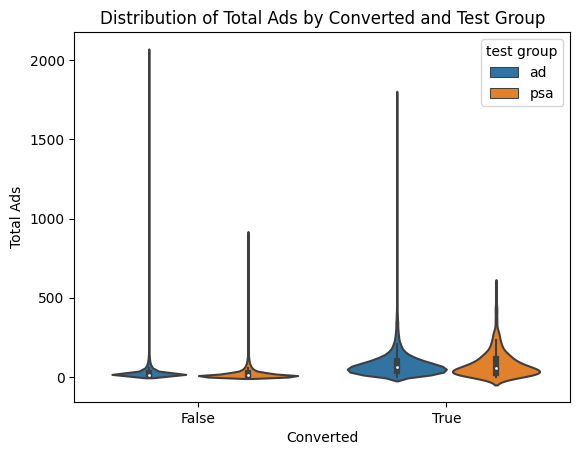

In [20]:
sns.violinplot(x="converted", y="total ads", hue="test group", data=df)
plt.title("Distribution of Total Ads by Converted and Test Group")
plt.xlabel("Converted")
plt.ylabel("Total Ads")
plt.show()

<Axes: xlabel='most ads day', ylabel='converted'>

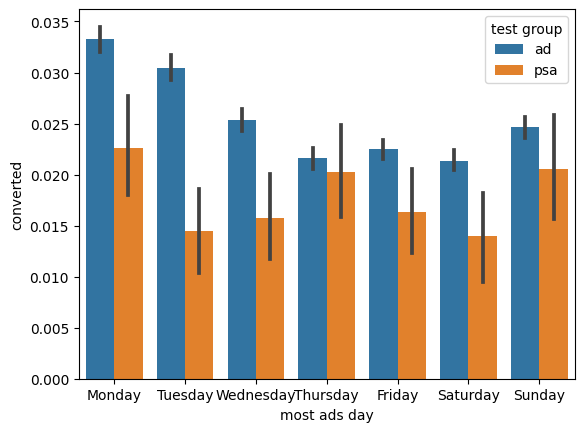

In [21]:
sns.barplot(x="most ads day", y="converted", hue="test group", data=df, order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

<Axes: xlabel='most ads hour', ylabel='converted'>

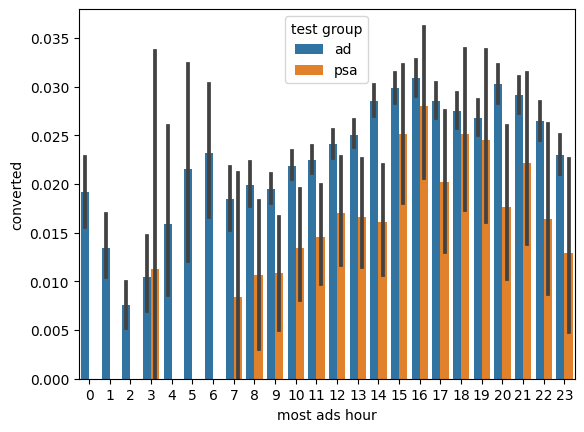

In [22]:
sns.barplot(x="most ads hour", y="converted", hue="test group", data=df)

In [28]:
conversion_by_hour = df.groupby("most ads hour")["converted"].mean()

In [30]:
max_conversion_hour = conversion_by_hour.idxmax()

In [31]:
print("The hour of the day with the highest conversion rate was:", max_conversion_hour)

The hour of the day with the highest conversion rate was: 16


In [39]:
conversion_by_day = df.groupby(["most ads day", "test group"])["converted"].mean()
conversion_by_day = conversion_by_day.unstack(level=1)
conversion_by_day = conversion_by_day.sort_values(by=["ad", "psa"], ascending=False)
print(conversion_by_day)

test group          ad       psa
most ads day                    
Monday        0.033241  0.022559
Tuesday       0.030440  0.014448
Wednesday     0.025356  0.015759
Sunday        0.024620  0.020595
Friday        0.022465  0.016303
Thursday      0.021637  0.020230
Saturday      0.021307  0.013996


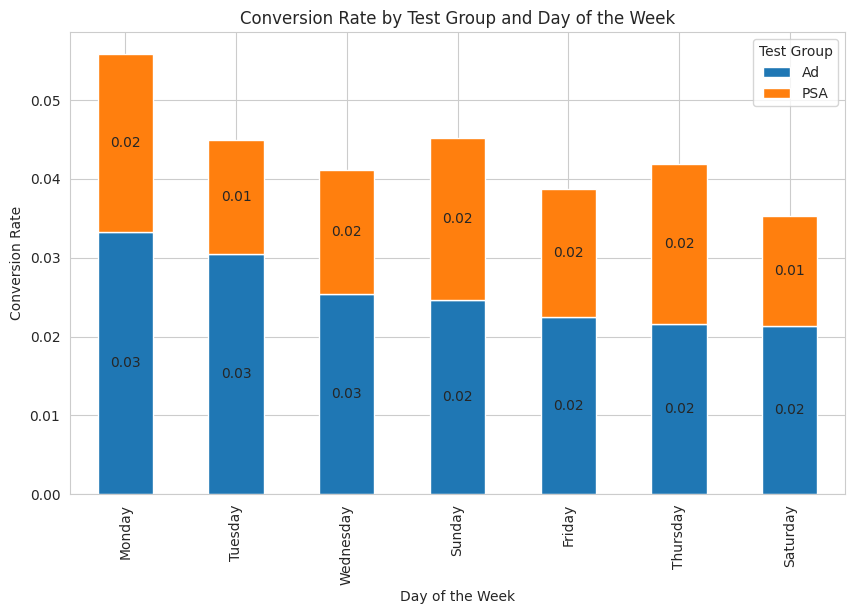

In [40]:
sns.set_style("whitegrid")
ax = conversion_by_day.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Conversion Rate by Test Group and Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Conversion Rate")

for i in range(conversion_by_day.shape[0]):
    ad_value = conversion_by_day.iloc[i]["ad"]
    psa_value = conversion_by_day.iloc[i]["psa"]
    ax.text(i, ad_value / 2, f"{ad_value:.2f}", ha="center", va="center")
    ax.text(i, ad_value + psa_value / 2, f"{psa_value:.2f}", ha="center", va="center")

plt.legend(title="Test Group", labels=["Ad", "PSA"])
plt.show()

In [41]:
conversion_by_hour = df.groupby("most ads hour")["converted"].mean()

top_10_less_business_hours = conversion_by_hour.sort_values().head(10)


print("Top 10 hours with less business:")
print(top_10_less_business_hours)

Top 10 hours with less business:
most ads hour
2     0.007313
3     0.010452
1     0.012911
4     0.015235
7     0.018111
0     0.018425
9     0.019191
8     0.019516
5     0.020915
10    0.021521
Name: converted, dtype: float64


In [44]:
print("The conversion rate for the ad group is {:.2f}%".format(conversion_rates["ad"] * 100))
print("The conversion rate for the PSA group is {:.2f}%".format(conversion_rates["psa"] * 100))
print("The t-test p-value is {:.4f}".format(ttest_results.pvalue))

The conversion rate for the ad group is 2.55%
The conversion rate for the PSA group is 1.79%
The t-test p-value is 0.0000



The ad group exhibited a higher conversion rate of 2.55% compared to the PSA group's conversion rate of 1.79%. This indicates that the ad campaign was more effective in generating conversions compared to the PSA.

The obtained p-value of 0.0000 from the t-test suggests that the difference in conversion rates between the two groups is statistically significant. This implies that the observed disparity in conversion rates is unlikely to have occurred by chance alone. Consequently, we can have greater confidence in attributing the discrepancy to the impact of the ads.

In summary, the ad campaign demonstrated success in driving conversions, and the statistically significant difference in conversion rates supports the effectiveness of the ad group over the PSA group.






